In [1]:
from network import Layer
from network import Network
from program_functions import data_read_classification
from program_functions import data_read_regression
from program_functions import plot_classification
from program_functions import plot_regression
from program_functions import plot_errors
import numpy as np
np.random.seed(seed = 0)

In [2]:
def test_parametrs(x, lrate_min, lrate_max, lrate_step, mom_min, mom_max, mom_step = 0.1, iterations = 100):
    lrate = np.arange(lrate_min, lrate_max, lrate_step)
    momentum = np.arange(mom_min, mom_max, mom_step)
    errors = np.zeros((len(lrate),len(momentum)))
    for i in range(len(lrate)):
        for j in range(len(momentum)):
            brain = Network(learning_rate = lrate[i], momentum_rate = momentum[j], iterations = iterations)
            brain.add(Layer(1,1,'sigmoid'))
            brain.add(Layer(1,1,'linear'))
            all_errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
            errors[i,j] = all_errors[0][iterations - 1]
    return errors

def test_lr_range(x, lrate_min, lrate_max, lrate_step, momentum = 0.9, iterations = 100):
    lrate = np.arange(lrate_min, lrate_max, lrate_step)
    errors = np.zeros(len(lrate))
    for i in range(len(lrate)):
        brain = Network(learning_rate = lrate[i], momentum_rate = momentum, iterations = iterations)
        brain.add(Layer(1,5,'sigmoid'))
        brain.add(Layer(5,10,'sigmoid'))
        brain.add(Layer(10,5,'sigmoid'))
        brain.add(Layer(5,1,'linear'))
        all_errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
        errors[i] = all_errors[0][iterations - 1]
    return [lrate, errors]

def test_lr(x, lrate , momentum = 0.9, iterations = 100):
    errors = np.zeros(len(lrate))
    for i in range(len(lrate)):
        brain = Network(learning_rate = lrate[i], momentum_rate = momentum, iterations = iterations)
        brain.add(Layer(1,5,'sigmoid'))
        brain.add(Layer(5,10,'sigmoid'))
        brain.add(Layer(10,5,'sigmoid'))
        brain.add(Layer(5,1,'linear'))
        all_errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
        errors[i] = all_errors[0][iterations - 1]
    return [lrate, errors]
            
        




--- 149.04227447509766 seconds ---


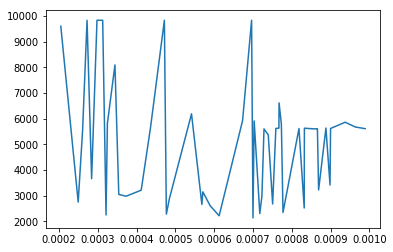

In [20]:
import matplotlib.pyplot as plt
import time
start_time = time.time()

lrate = np.random.uniform(0.0002,0.001,50)
lrate_sorted = np.sort(lrate)
x = data_read_regression('multimodal',100)
errors = test_lr(x, lrate_sorted)
plt.plot(errors[0],errors[1])

print("--- %s seconds ---" % (time.time() - start_time))

--- 11.168818473815918 seconds ---


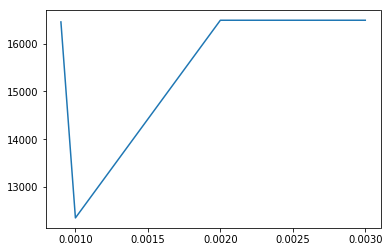

In [84]:
import matplotlib.pyplot as plt
import time
start_time = time.time()

lrate = [0.0009,0.001, 0.002,0.003]
x = data_read_regression('square',100)
errors = test_lr(x, lrate)
plt.plot(errors[0],errors[1])

print("--- %s seconds ---" % (time.time() - start_time))

--- 13.957064390182495 seconds ---


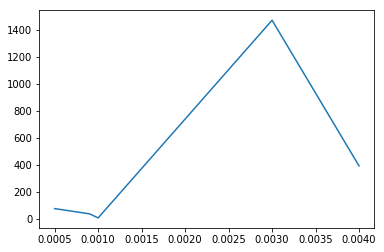

In [81]:
import matplotlib.pyplot as plt
import time
start_time = time.time()

lrate = [0.0005,0.0009,0.001, 0.003,0.004]
x = data_read_regression('activation',100)
errors = test_lr(x, lrate)
plt.plot(errors[0],errors[1])

print("--- %s seconds ---" % (time.time() - start_time))

--- 8.423184394836426 seconds ---


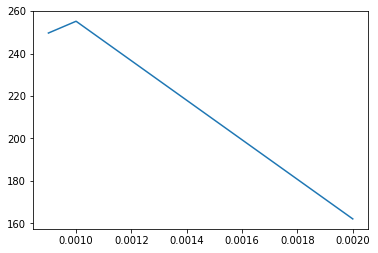

In [87]:
import matplotlib.pyplot as plt
import time
start_time = time.time()

lrate = [0.0009,0.001, 0.002]
x = data_read_regression('cube',100)
errors = test_lr(x, lrate)
plt.plot(errors[0],errors[1])

print("--- %s seconds ---" % (time.time() - start_time))